## Building a neural network to convert degrees celsius to fahrenheit

In [95]:
# Import the necessary modules
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt

import numpy as np


In [96]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

In [97]:
for i in range(len(celsius)):
    print(f"{celsius[i]} degress celsius = {fahrenheit[i]} fahrenheit")

-40.0 degress celsius = -40.0 fahrenheit
-10.0 degress celsius = 14.0 fahrenheit
0.0 degress celsius = 32.0 fahrenheit
8.0 degress celsius = 46.0 fahrenheit
15.0 degress celsius = 59.0 fahrenheit
22.0 degress celsius = 72.0 fahrenheit
38.0 degress celsius = 100.0 fahrenheit


### Creating a neural layer model

In [98]:
layer1 = tf.keras.layers.Dense(units = 1, input_shape=[1])
model = tf.keras.Sequential([layer1])

In [99]:
model.compile(loss = "mean_squared_error",
             optimizer = tf.keras.optimizers.Adam(0.1))

In [100]:
training_model = model.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("Finished training the model")

Finished training the model


### Visualize our training

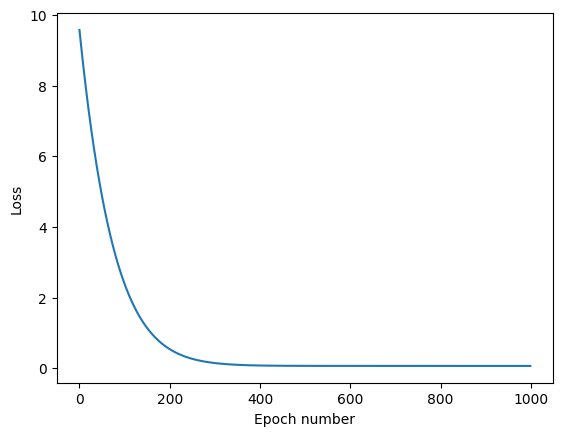

In [101]:
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.plot(train_model.history['loss'])

### Make a prediction

In [102]:
print(model.predict([-40, 100]))

1/1 [==============================] - 0s 54ms/step
[[-40.006554]
 [211.74298 ]]


### Get the weights of first layer

In [103]:
print("These are layer1 variables: {}".format(layer1.get_weights()))

These are layer1 variables: [array([[1.798211]], dtype=float32), array([31.921885], dtype=float32)]


## Creating a model with multiple layers

In [104]:
layer1 = tf.keras.layers.Dense(units=4, input_shape=[1])
layer2 = tf.keras.layers.Dense(units=4)
layer3 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([layer1, layer2, layer3])

model.compile(loss = 'mean_squared_error',
             optimizer = tf.keras.optimizers.Adam(0.1))

In [107]:
model.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("Finished training the model.")
print("Model prediction for 0 celsius is {} and for 100 celsius is {}".format(model.predict([0]), model.predict([100])))

Finished training the model.
1/1 [==============================] - 0s 32ms/step
Model prediction for 0 celsius is [[31.952528]] and for 100 celsius is [[211.74745]]


In [109]:
print(f"These are layer1 variables: {layer1.get_weights()}")
print(f"These are layer2 variables: {layer2.get_weights()}")
print(f"These are layer1 variables: {layer3.get_weights()}")

These are layer1 variables: [array([[ 0.3617517 , -0.6045577 ,  0.0644765 , -0.13902831]],
      dtype=float32), array([ 4.1234894, -3.7688198, -3.23602  ,  2.3545418], dtype=float32)]
